In [11]:
import os
os.getcwd()

'C:\\Users\\mhetr'

In [12]:
import os

os.chdir(r"C:\Users\mhetr\Downloads\Data Science\10th, 11th - Ensamble Learning\9th- Ensamble learning\Machine Learning CAPSTONE PROJECT\HEIGHT & WEIGHT")


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [14]:
df= pd.read_csv('SOCR-HeightWeight.csv')

In [15]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [16]:
df['Weight_kg']=df['Weight(Pounds)']*0.453592  

# Convert inches to the desired format (feet.inches) 
df['Height(Feet.Inches)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) / 10

In [17]:
df.describe()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [18]:
drop_col=['Index','Height(Inches)','Weight(Pounds)'] # selecting columns to del it

#droping columns
df=df.drop(columns=drop_col,axis=1)

In [19]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
11655,60.107381,5.692683
16693,54.077556,5.925047
12543,56.716236,5.719021


In [20]:
df.shape

(25000, 2)

In [21]:
df.isna().any()

Weight_kg              False
Height(Feet.Inches)    False
dtype: bool

In [22]:
df.dtypes

Weight_kg              float64
Height(Feet.Inches)    float64
dtype: object

In [23]:
df.corr()

,Weight_kg,Height(Feet.Inches)
Weight_kg,1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


In [24]:
df.describe()

,Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


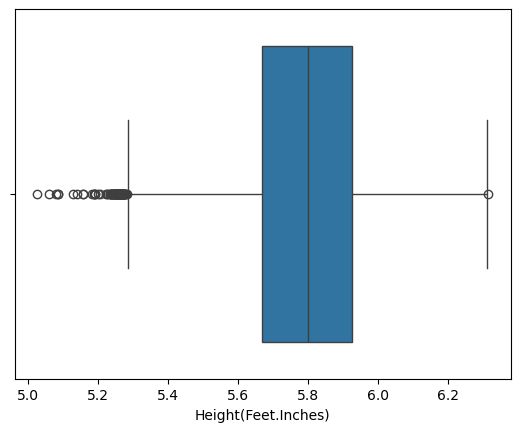

In [25]:
sns.boxplot(x=df['Height(Feet.Inches)'])
plt.show()

<Axes: xlabel='Weight_kg'>

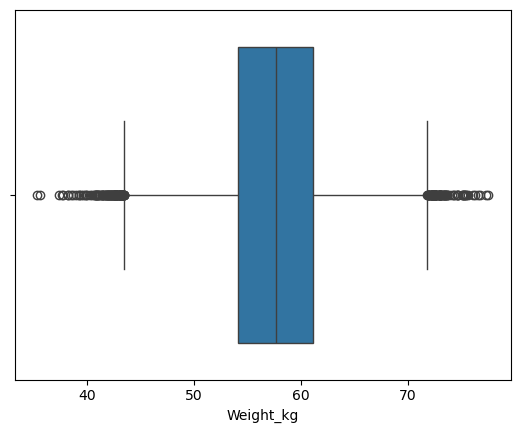

In [26]:
sns.boxplot(x=df['Weight_kg'])

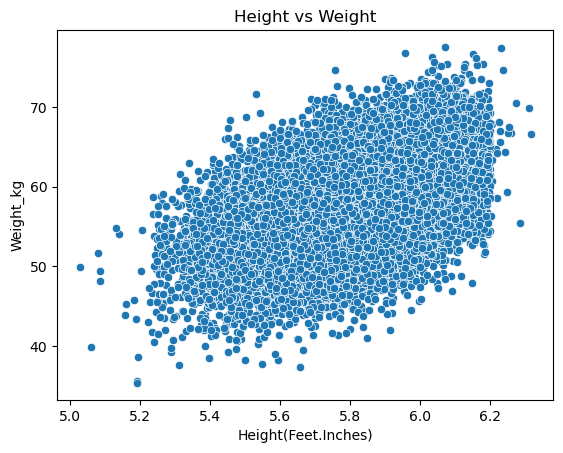

In [30]:
x=df['Height(Feet.Inches)']
y=df['Weight_kg']

sns.scatterplot(x=x,y=y)
plt.title('Height vs Weight')
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight_kg')
plt.show()

In [28]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
23161,54.326623,5.833747
20398,59.857225,5.785106
2880,64.232846,6.066714


In [31]:
x=df.iloc[:,1]
y=df.iloc[:,0]

In [32]:
x

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [34]:
df.columns[1]

'Height(Feet.Inches)'

In [35]:
df.columns[0]

'Weight_kg'

In [37]:
from sklearn.preprocessing import StandardScaler


In [42]:
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x.values.reshape(-1,1))


scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
x_train_2d = x_train.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)

# Reshape testing data
x_test_2d = x_test.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

print("Shape of training data (x):", x_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (x):", x_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

Shape of training data (x): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (x): (5000, 1)
Shape of testing data (y): (5000, 1)


In [48]:
lr=LinearRegression() #linear Regression
lr

LinearRegression()

In [50]:
lr.fit(x_train_2d,y_train_2d)

LinearRegression()

In [52]:
y_pred=lr.predict(x_test_2d)
y_pred[:10]

array([[55.94425481],
       [60.91226889],
       [56.56867714],
       [56.42643564],
       [51.52547113],
       [52.93798976],
       [60.30463034],
       [60.27256006],
       [62.74472434],
       [63.0616341 ]])

In [53]:
y_test_2d[:10]

array([[60.87349789],
       [64.25661383],
       [50.63170805],
       [53.62895327],
       [46.5397639 ],
       [48.20970821],
       [55.81821505],
       [55.03481631],
       [76.60307055],
       [55.98708736]])

In [54]:
mean_squared_error(y_pred,y_test_2d)

21.69730652290755

In [55]:
model_dtr=DecisionTreeRegressor()
model_dtr

DecisionTreeRegressor()

In [57]:
model_dtr.fit(x_train_2d, y_train_2d)

DecisionTreeRegressor()

In [59]:
y_pred_dtr=model_dtr.predict(x_test_2d)
y_pred_dtr[:5]

array([63.37542065, 56.46639802, 56.7162365 , 64.71347169, 57.84078178])

In [60]:
mean_squared_error(y_pred_dtr,y_test_2d)

41.50751860513505

# Random Forest Regression

In [62]:
model_rfr=RandomForestRegressor()
model_rfr.fit(x_train_2d,y_train_2d)

C:\Users\mhetr\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [63]:
y_pred_rfr=(x_test_2d)
y_pred_rfr[:10]

array([[5.675233],
       [6.023626],
       [5.719022],
       [5.709047],
       [5.365356],
       [5.464412],
       [5.981014],
       [5.978765],
       [6.152131],
       [6.174355]])

In [64]:
mean_squared_error(y_pred_rfr,y_test_2d)

2708.30376658499

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define model
model_lr = LinearRegression()

# Correct parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],  # ✅ Must be capital X
    'positive': [True, False]
}

# GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit (x_train_2d and y_train_2d must be correct shape)
grid_search.fit(x_train_2d, y_train_2d)

# Output
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Neg. MSE):", grid_search.best_score_)


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score (Neg. MSE): -20.836260216566203


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, x_train_2d, y_train_2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)


MSE Scores: [21.65411512 21.79844701 20.33072238 21.2128048  21.84713487 20.47547042
 20.38317103 20.4544885  21.45193422 18.76081422]


In [72]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model with the best parameters
final_model = LinearRegression(fit_intercept=False, copy_X=True)

# Fit the model to the entire training data
final_model.fit(x_train_2d, y_train_2d)

# Now you can use final_model to make predictions on new data


LinearRegression(fit_intercept=False)

In [73]:
import pickle

# Define the filename for the pickle file
filename = 'final_model.pkl'

# Save the final_model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)


In [74]:
os.path.abspath('final_model.pkl')

'C:\\Users\\mhetr\\Downloads\\Data Science\\10th, 11th - Ensamble Learning\\9th- Ensamble learning\\Machine Learning CAPSTONE PROJECT\\HEIGHT & WEIGHT\\final_model.pkl'

In [75]:
import pickle
import numpy as np

# Load the saved model from the file
filename = 'final_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Input height for prediction
height_input = 6.0

# Reshape the input height to match the shape expected by the model (2D array)
height_input_2d = np.array(height_input).reshape(1, -1)

# Use the loaded model to make predictions
predicted_weight = loaded_model.predict(height_input_2d)

# Print the predicted weight
print("Predicted weight:", predicted_weight[0, 0])


Predicted weight: 59.72023785370341
